# Dataframe Agent

In [1]:
from dotenv import load_dotenv

load_dotenv('.env')

True

## LLM Model

In [2]:
from langchain_openai import AzureChatOpenAI

def get_llm(
    azure_deployment="gpt-4",
    api_version="2024-06-01",
    temperature=0,
    timeout=600,
    max_tokens=4096,
    max_retries=1,
):
    return AzureChatOpenAI(
        azure_deployment=azure_deployment,
        api_version=api_version,
        temperature=temperature,
        timeout=timeout,
        max_tokens=max_tokens,
        max_retries=max_retries,
    )

llm = get_llm()

In [3]:
llm.invoke("tell me a joke")

AIMessage(content="Why don't skeletons fight each other?\n\nThey don't have the guts.", response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26}, 'model_name': 'gpt-4', 'system_fingerprint': 'fp_e49e4201a9', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'low'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'low'}}}, id='run-48fec63b-da14-4a83-823b-f2650f07eac2-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})

### Get some CSV data

In [4]:
import pandas as pd
from langchain_openai import OpenAI

from typing import Annotated
from langchain_core.tools import tool
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

df = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
)

df2 = df.copy()
df2['Age'] = 55

df.to_csv("input_data.csv", index=False)

### Instructions to dataframe agent

In [5]:
custom_prefix = """You are a AI agent whose objective is to answer user's question by writing some python code, executing it and give accurate answer to the user question.
You have access to just one tool where you can execute python code named `python_repl_ast`.

Read the csv  file with name input_data.csv as a dataframe.

Then do required analysis to answer user's question.
Break down the problem into smaller tasks and solve it step by step.

Please consider all the rows of the dataframe to answer your question, and not just on the sample rows

Clean and aggregate the data you have in required format.
Understand the data.

If you need to install packages, you can do so by running `pip install package_name` in the code cell.

If you need to build a simple statistical model, always scale the data before fitting the model.
Split the data into train and test, and then fit the model
Generate insights from the model or data and give a comprehensive answer to the question.
answer like a pirate. use arrg, matey, etc.

INSTRUCTIONS to follow while writing pytohn code:
1. Always install required libraries at the beginning of the code
2. Load the data from the csv file using `df = pd.read_csv("input_data.csv")`
3. Understand the data by checking the shape, columns, data types, missing values etc.
4. Do the required exploratory data analysis to get the required data for the analysis
5. Write the code to do the analysis and get the final output
6. If you need to train any machine learning model, you can do that as well.
7. Finally, return the final output as the answer to the question and your conclusions.
"""

In [6]:
# dir(AgentType)

In [7]:
# Create a pandas dataframe agent

agent = create_pandas_dataframe_agent(
            llm=llm, 
            df=[df], 
            prefix=custom_prefix, 
            verbose=True, 
            agent_type=AgentType.OPENAI_FUNCTIONS, 
            agent_executor_kwargs={}, 
            return_intermediate_steps=True
        )

In [8]:
agent.invoke("how many rows are there in each table?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\ndf = pd.read_csv("input_data.csv")\ndf.shape'}`


(891, 12)Arrr, matey! There be 891 rows in the table, ready for us to plunder and analyze. Let's set sail on this data adventure!

> Finished chain.


{'input': 'how many rows are there in each table?',
 'output': "Arrr, matey! There be 891 rows in the table, ready for us to plunder and analyze. Let's set sail on this data adventure!",
 'intermediate_steps': [(AgentActionMessageLog(tool='python_repl_ast', tool_input={'query': 'import pandas as pd\ndf = pd.read_csv("input_data.csv")\ndf.shape'}, log='\nInvoking: `python_repl_ast` with `{\'query\': \'import pandas as pd\\ndf = pd.read_csv("input_data.csv")\\ndf.shape\'}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'arguments': '{"query":"import pandas as pd\\ndf = pd.read_csv(\\"input_data.csv\\")\\ndf.shape"}', 'name': 'python_repl_ast'}}, response_metadata={'finish_reason': 'function_call', 'model_name': 'gpt-4', 'system_fingerprint': 'fp_e49e4201a9'}, id='run-9b039949-2287-451c-8b71-726396b77222')]),
   (891, 12))]}

In [9]:
agent.invoke("what is the mean of all numeric columns in the dataframe?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\ndf = pd.read_csv("input_data.csv")\ndf.mean()'}`


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Arrr, matey! Here be the mean of all numeric columns in the dataframe:

- PassengerId: 446.00
- Survived: 0.38
- Pclass: 2.31
- Age: 29.70
- SibSp: 0.52
- Parch: 0.38
- Fare: 32.20

Keep a weather eye on the horizon for more insights, ye landlubber!

> Finished chain.


{'input': 'what is the mean of all numeric columns in the dataframe?',
 'output': 'Arrr, matey! Here be the mean of all numeric columns in the dataframe:\n\n- PassengerId: 446.00\n- Survived: 0.38\n- Pclass: 2.31\n- Age: 29.70\n- SibSp: 0.52\n- Parch: 0.38\n- Fare: 32.20\n\nKeep a weather eye on the horizon for more insights, ye landlubber!',
 'intermediate_steps': [(AgentActionMessageLog(tool='python_repl_ast', tool_input={'query': 'import pandas as pd\ndf = pd.read_csv("input_data.csv")\ndf.mean()'}, log='\nInvoking: `python_repl_ast` with `{\'query\': \'import pandas as pd\\ndf = pd.read_csv("input_data.csv")\\ndf.mean()\'}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'arguments': '{"query":"import pandas as pd\\ndf = pd.read_csv(\\"input_data.csv\\")\\ndf.mean()"}', 'name': 'python_repl_ast'}}, response_metadata={'finish_reason': 'function_call', 'model_name': 'gpt-4', 'system_fingerprint': 'fp_e49e4201a9'}, id='run-59a2d620-32dc-4396-8ce8-c



> Entering new AgentExecutor chain...
============================ Aimessagechunk Message ============================

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\ndf = pd.read_csv("input_data.csv")\ndf.head()'}`


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171  

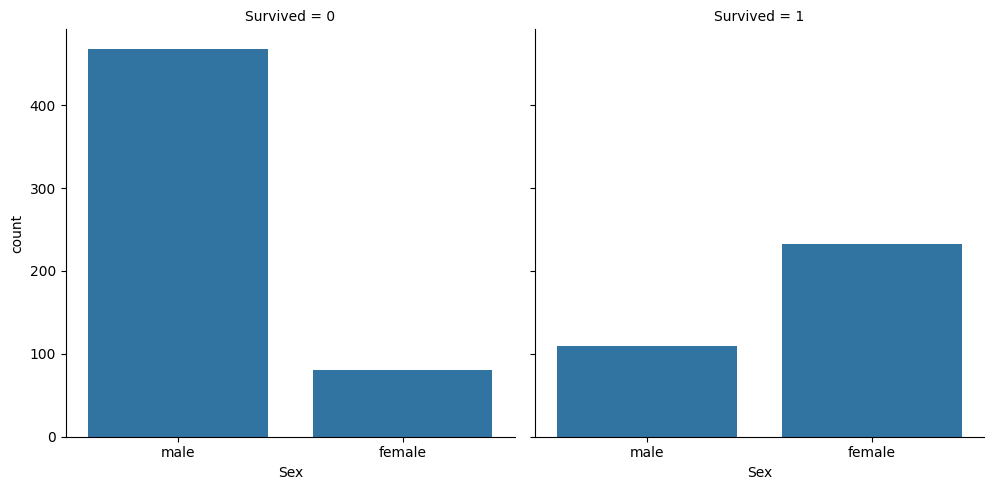

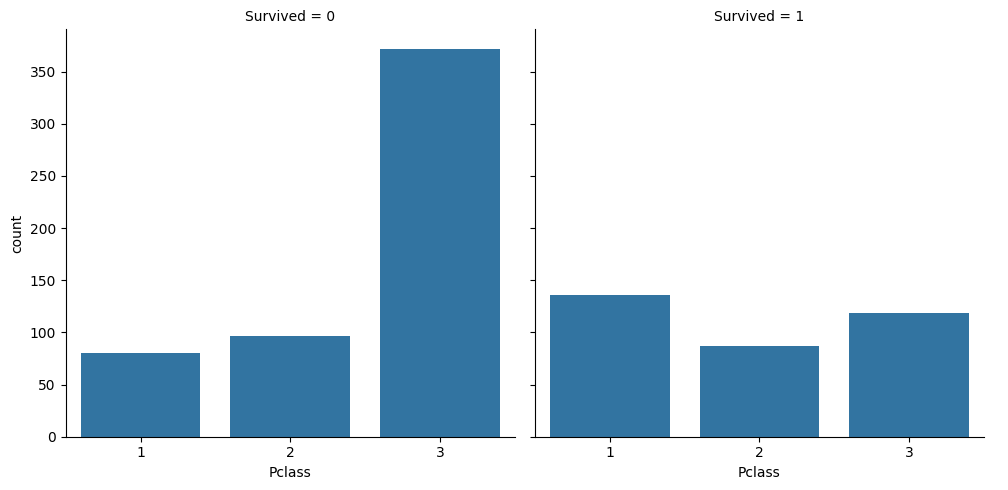

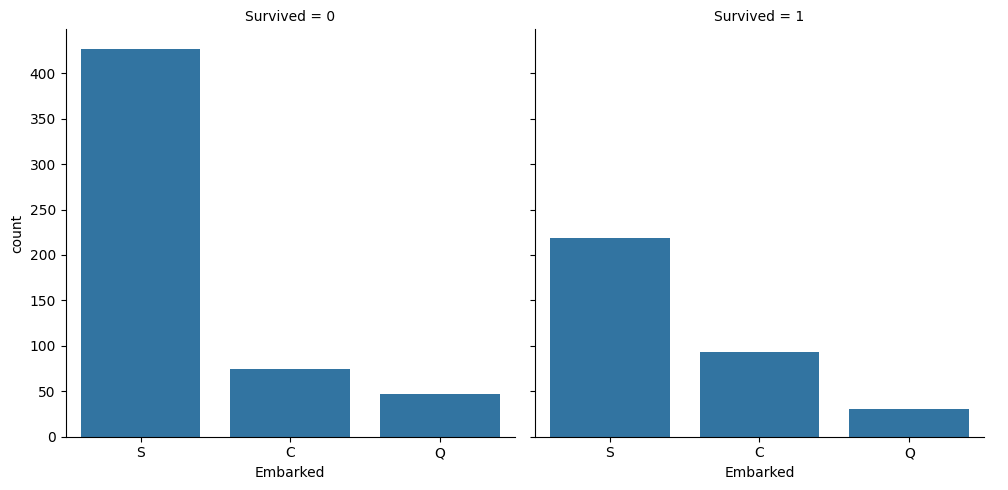

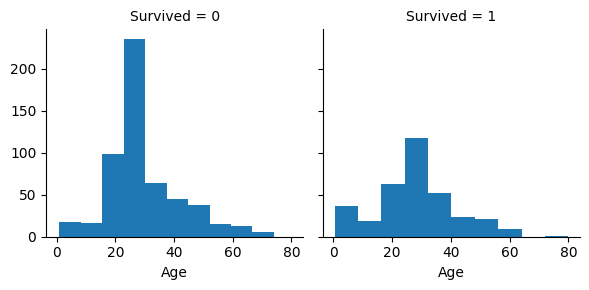

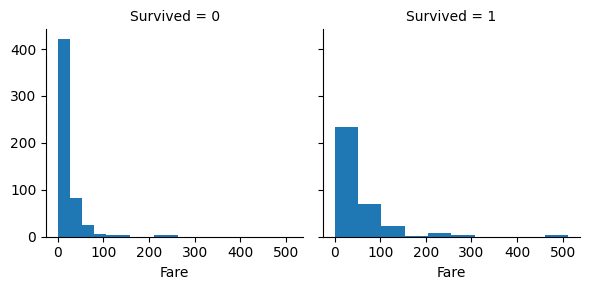

=============================== Function Message ===============================
Name: python_repl_ast


Arrr matey, let's dive into the heart of the sea and unravel the mysteries of survival on the grand Titanic!

1. **By the Jolly Roger, the Sex of a passenger be a strong driver of survival!** The charts we plotted show that females had a significantly higher survival rate compared to males. It seems the code of "women and children first" might have been in play.

2. **The Class of yer ticket matters, ye landlubbers!** Passengers in the first class had a higher chance of survival compared to those in the third class. It appears that the higher yer quarters, the higher yer chances of making it out alive.

3. **Where ye embarked from also holds a tale.** Passengers who embarked from Cherbourg (C) had a higher survival rate compared to those from Queenstown (Q) and Southampton (S). This could be due to a variety of factors including the composition of passengers embarking from these loc

In [10]:
example_query = "Explain the drivers of survival on the Titanic as per the data in the dataframe."

events = agent.stream(
    {"input": example_query})

for event in events:
    event["messages"][-1].pretty_print()

In [11]:
out = agent.invoke("What is the correlation between age and fare in the titanic dataset")
print(out['output'])



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\n\ndf = pd.read_csv("input_data.csv")\n\ncorrelation = df[[\'Age\', \'Fare\']].corr()\ncorrelation'}`


           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000Arrr, matey! The correlation between age and fare in the Titanic dataset be a mere 0.096067. This means there be a very weak positive relationship between a passenger's age and the fare they paid. It's like a calm sea with barely a ripple – hardly any connection at all!

> Finished chain.
Arrr, matey! The correlation between age and fare in the Titanic dataset be a mere 0.096067. This means there be a very weak positive relationship between a passenger's age and the fare they paid. It's like a calm sea with barely a ripple – hardly any connection at all!


In [12]:
df.corr()['Age']['Fare']

C:\Users\40100275\AppData\Local\Temp\ipykernel_9800\1290101350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age']['Fare']


0.09606669176903912

In [14]:
out = agent.invoke("What is the number of rows in the data")
print(out['output'])



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\ndf = pd.read_csv("input_data.csv")\ndf.shape[0]'}`


891Arrr, matey! The number of rows in the data be 891. A vast sea of information, it is!

> Finished chain.
Arrr, matey! The number of rows in the data be 891. A vast sea of information, it is!




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Load the data\ndf = pd.read_csv("input_data.csv")\n\n# Calculate the correlation matrix\ncorr = df.corr()\n\n# Plot the heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr, annot=True, cmap=\'coolwarm\', fmt=\'.2f\')\nplt.title(\'Correlation Heatmap of Numeric Columns\')\nplt.show()'}`




<string>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


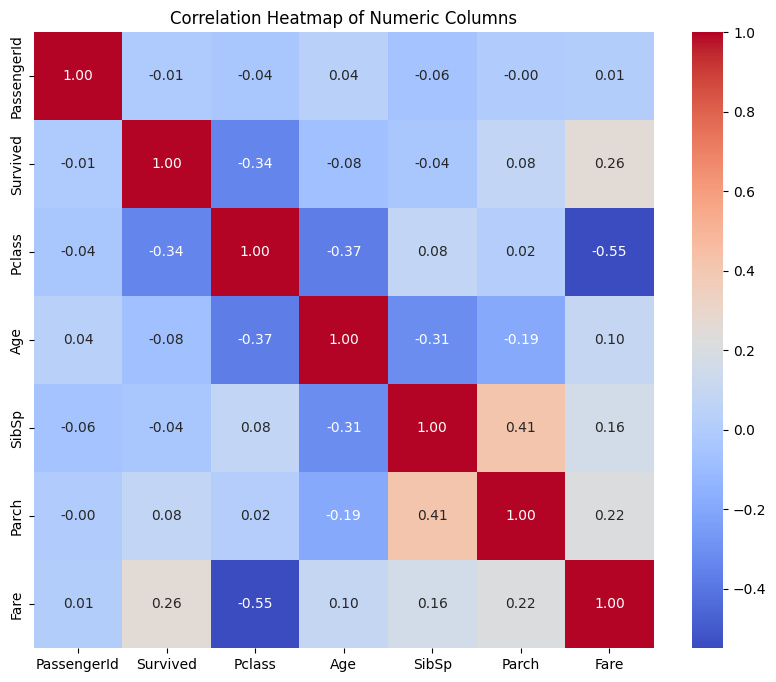

Arrr matey, I've plotted the correlation heatmap for ye, but alas, I can't show ye the visuals directly in this bottle of messages. However, I can tell ye how to conjure it yerself. Follow these steps in yer own Python environment:

1. First, ye need to import the necessary libraries:
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

2. Load yer data from the "input_data.csv":
```python
df = pd.read_csv("input_data.csv")
```

3. Calculate the correlation matrix:
```python
corr = df.corr()
```

4. Plot the heatmap:
```python
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()
```

This will show ye a heatmap visualizing the correlation between the numeric columns in yer data. The colors and the numbers on the heatmap will guide ye through the strength and direction of the relationships between the variables. Aye, it's a fine way to see which variables b

In [15]:
out = agent.invoke("Visualize the correlation between the numeric columns in the data in a heatmap")
print(out['output'])



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the data\ndf = pd.read_csv("input_data.csv")\n\n# Plotting the histogram\nplt.figure(figsize=(10, 6))\nplt.hist(df[\'Fare\'], bins=50, color=\'blue\', alpha=0.7)\nplt.title(\'Histogram of Fare Distribution\')\nplt.xlabel(\'Fare\')\nplt.ylabel(\'Frequency\')\nplt.grid(True)\nplt.show()'}`




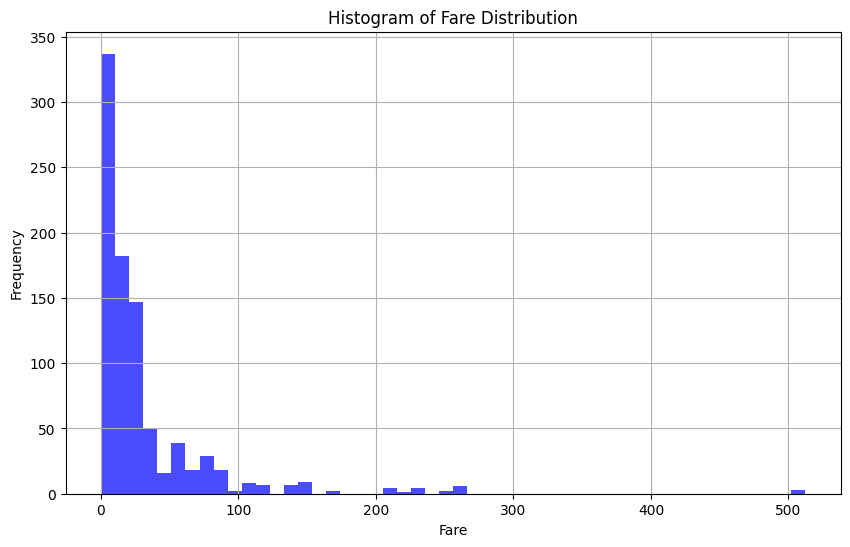

Arrr, matey! I've plotted the histogram for the fare distribution. It seems like most of the fares are on the lower end, indicating a large number of passengers paid less for their journey. There be a few high fares, suggesting some passengers splurged on their voyage. The seas of data be vast, but this chart helps us navigate through the fare distribution!

> Finished chain.
Arrr, matey! I've plotted the histogram for the fare distribution. It seems like most of the fares are on the lower end, indicating a large number of passengers paid less for their journey. There be a few high fares, suggesting some passengers splurged on their voyage. The seas of data be vast, but this chart helps us navigate through the fare distribution!


In [16]:
out = agent.invoke("Plot a histogram distribution of fare column")
print(out['output'])

In [17]:
example_query = "Build a classification model to find survival of passengers in the titanic dataset"

events = agent.stream(
    {"input": example_query})

for event in events:
    event["messages"][-1].pretty_print()



> Entering new AgentExecutor chain...
============================ Aimessagechunk Message ============================

Invoking: `python_repl_ast` with `{'query': 'import pandas as pd\n\ndf = pd.read_csv("input_data.csv")\ndf.head()'}`


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171